In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Basically, `train.csv` contains information on various parameters and selling price of many different houses. ([link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data))

In [2]:
data = pd.read_csv("train.csv",",")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As beginners, we will only be using the `LotArea` and `SalePrice` columns for the time being. When we try to find the correlation between one variable and another desired variable which we would like to predict, we call that "Univariate Linear Regression", as our analysis is being done based on the dependence of our desired output on one single variable.

In [4]:
reqData = data[['LotArea','SalePrice']]

In [5]:
reqData.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


Text(0.5, 1.0, 'Our Data Points: ')

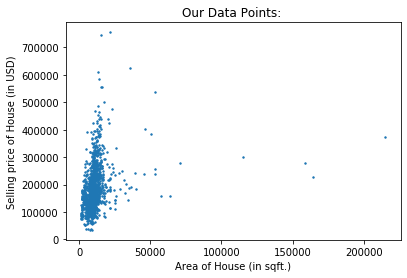

In [6]:
plt.scatter(x=reqData["LotArea"],y=reqData["SalePrice"],s=2)
plt.xlabel("Area of House (in sqft.)")
plt.ylabel("Selling price of House (in USD)")
plt.title("Our Data Points: ")

Now, as you can see, there is a lot of data concentrated in one region, with a few outliers in terms of price and house size.

Now, there are always a few rows of data which are empty. For the time being, we will drop those data points. However, there are ways to salvage such data points as well, but we won't be learning that now.

In [7]:
print(reqData.shape) # before dropping empty values

(1460, 2)


In [8]:
reqData = reqData.dropna(axis=0,how="any") # this drops all empty values in our dataset
print(reqData.shape)

(1460, 2)


So, it appears that there aren't any empty data points. Good for us, more data!

Text(0.5, 1.0, 'Our Data Points: ')

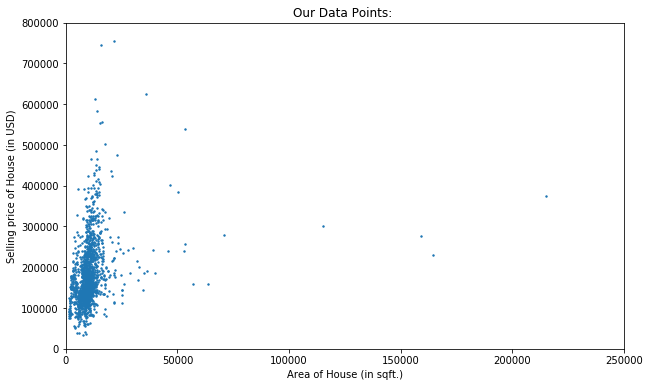

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(x=reqData["LotArea"],y=reqData["SalePrice"],s=2)
plt.xlim([0,250000])
plt.ylim([0,800000])
plt.xlabel("Area of House (in sqft.)")
plt.ylabel("Selling price of House (in USD)")
plt.title("Our Data Points: ")

Now, we will do the actual regression

In [10]:
theta0 = 0#np.random.uniform(-500000,700000)
print(theta0)
theta1 = 0#np.random.uniform(0,100)
print(theta1)

def cost(t0,t1,x,y):
    m = len(x)
    s = 0
    for i in range(m):
        s = s + (t0 + t1 * x[i] - y[i])**2
    return s/(2*m)

def gradient_descent(t0,t1,lrate,x,y):
    m = len(x)
    s0 = 0
    s1 = 0
    for i in range(m):
        s0 = s0 + (t0+t1*x[i]-y[i])
        s1 = s1 + x[i]*(t0+t1*x[i]-y[i])
    grad0 = 1/m * s0
    grad1 = 1/m * s1
    temp0 = t0 - grad0 * lrate
    temp1 = t1 - grad1 * lrate
    return [temp0,temp1]

def gradient(t0,t1,x,y):
    m = len(x)
    s0 = 0
    s1 = 0
    for i in range(m):
        s0 = s0 + (t0+t1*x[i]-y[i])
        s1 = s1 + x[i]*(t0+t1*x[i]-y[i])
    grad0 = 1/m * s0
    grad1 = 1/m * s1
    return [grad0,grad1]

x_val = reqData["LotArea"].values
y_val = reqData["SalePrice"].values
x=0
while abs(gradient(theta0,theta1,x_val,y_val)[0])>1 and abs(gradient(theta0,theta1,x_val,y_val)[1])>0.5:
    [theta0, theta1] = gradient_descent(theta0,theta1,0.000000005,x_val,y_val)
    #print(gradient(theta0,theta1,x_val,y_val))
    #print(theta0,theta1)
    #print(cost(theta0,))
#print(theta0,theta1)

0
0


KeyboardInterrupt: 

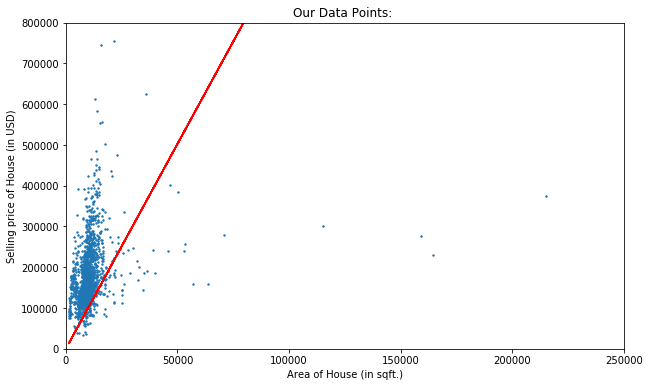

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x=reqData["LotArea"],y=reqData["SalePrice"],s=2)
plt.xlim([0,250000])
plt.ylim([0,800000])
plt.xlabel("Area of House (in sqft.)")
plt.ylabel("Selling price of House (in USD)")
plt.title("Our Data Points: ")
y_pred = theta1*x_val + theta0
plt.plot(x_val,y_pred,"r-")
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

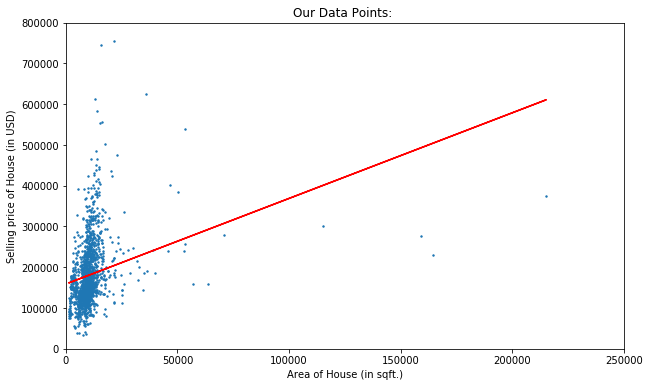

In [12]:
from sklearn.linear_model import LinearRegression

linregmodel = LinearRegression()
linregmodel.fit(x_val.reshape(-1,1),y_val.reshape(-1,1))

plt.figure(figsize=(10,6))
plt.scatter(x=reqData["LotArea"],y=reqData["SalePrice"],s=2)
plt.xlim([0,250000])
plt.ylim([0,800000])
plt.xlabel("Area of House (in sqft.)")
plt.ylabel("Selling price of House (in USD)")
plt.title("Our Data Points: ")
#plt.plot(x_val,linregmodel.predict(x_val.reshape(-1,1),"r-"))

plt.plot(x_val,linregmodel.predict(x_val.reshape(-1,1)), color='red')

linregmodel

How to remove outlying data:

In [16]:
import scipy
array = abs(scipy.stats.zscore(reqData))
dataWithoutOutliers = reqData[(array < 3).all(axis=1)]
dataWithoutOutliers

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [18]:
newx_val = dataWithoutOutliers["LotArea"].values.reshape([-1,1])
newy_val = dataWithoutOutliers["SalePrice"].values.reshape([-1,1])
newLinRegModel = LinearRegression()

newLinRegModel.fit(newx_val,newy_val)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'After removing outliers: ')

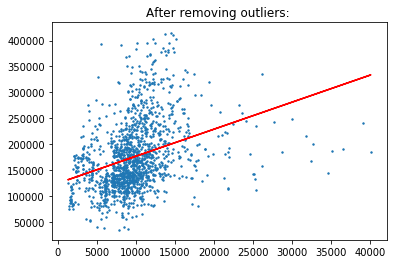

In [21]:
plt.plot(newx_val, newLinRegModel.predict(newx_val), "r-")
plt.scatter(newx_val,newy_val,s=2)
plt.title("After removing outliers: ")